# House Prices - Advanced Regression Techniques
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=100%>

Peça a um comprador de imóvel residencial para descrever a casa dos seus sonhos, e ele provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia. Mas o conjunto de dados desta competição prova que influencia muito mais as negociações de preço do que o número de quartos ou cerca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafa predição do preço final de cada casa. 

##  Skills
•Engenharia de recursos  <br/>
•Técnicas de regressão avançadas, como random forest and gradient boosting


## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
import plotly.express as px
%matplotlib inline
warnings.filterwarnings('ignore')

## Importando dados

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
ids=test['Id']
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

## Verificando tamanho do dataframe

In [5]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Verificando o tipo de cada feature

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Target feature

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

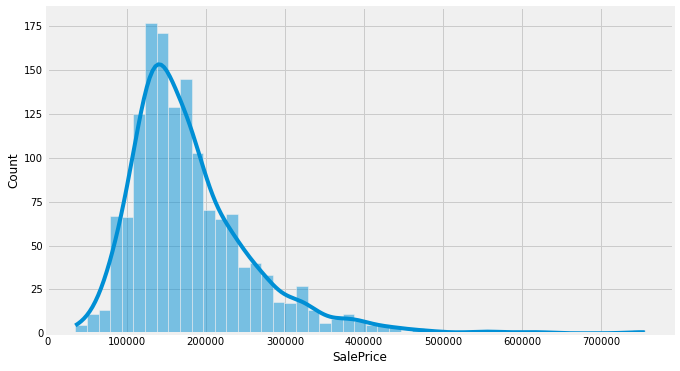

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='SalePrice',data=train, kde=True)

## Correlação das principais features

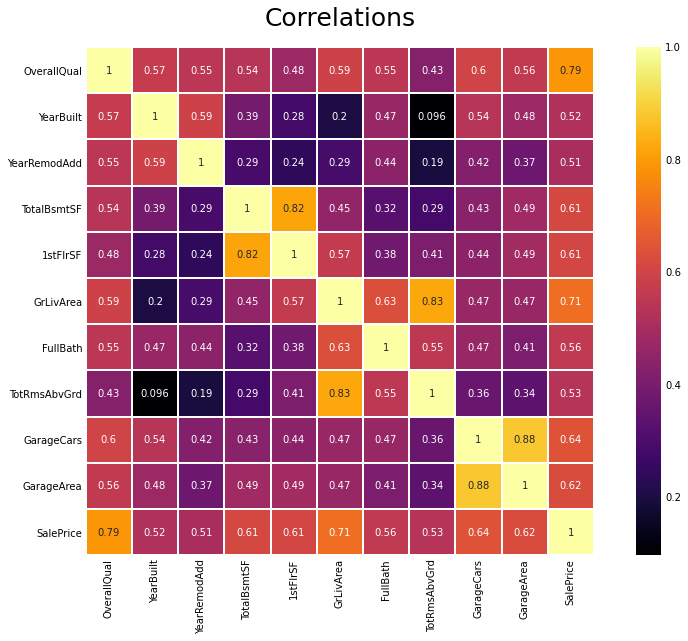

In [9]:
plt.figure(figsize=(12,9))
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='inferno',square=True,linewidths=1)
plt.title('Correlations',size=25,y=1.03)
plt.tight_layout();

In [10]:
corrs=train.drop('SalePrice',axis=1).corrwith(train['SalePrice']).sort_values(ascending=False)

In [11]:
corrs.head(5)



OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
dtype: float64

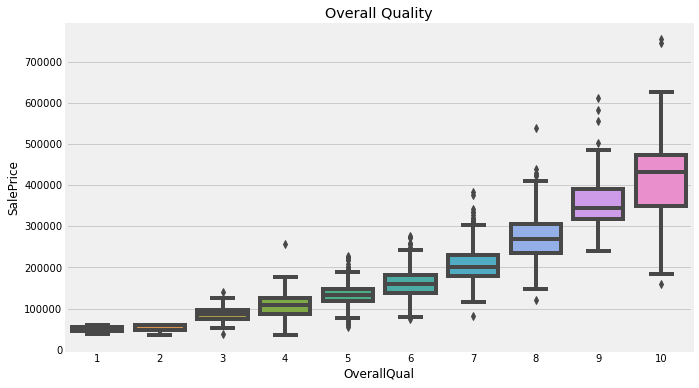

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='SalePrice',x='OverallQual')
plt.title('Overall Quality');

(-100.0, 6000.0)

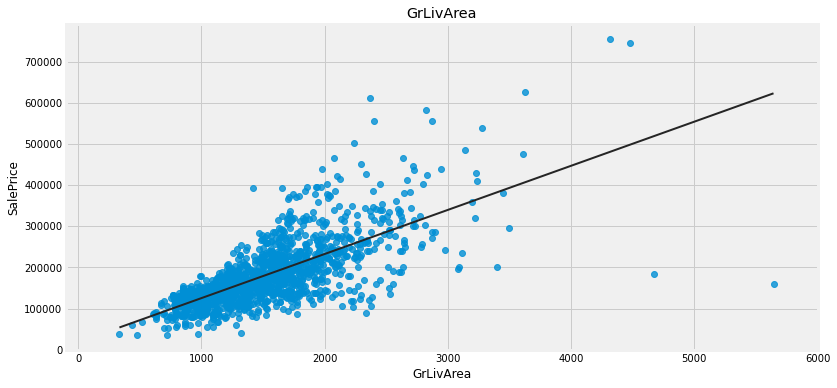

In [13]:
plt.figure(figsize=(12,6))
p1=sns.regplot(x='GrLivArea',y='SalePrice',data=train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')
plt.title('GrLivArea')
plt.xlim(-100, 6000)

## Outliers

In [14]:
train[train['GrLivArea']>4500][['OverallQual','GarageCars','GarageArea','SalePrice']]

,OverallQual,GarageCars,GarageArea,SalePrice
523,10,3,884,184750
1298,10,2,1418,160000


In [15]:
train.drop(index=[523,1298],inplace=True)

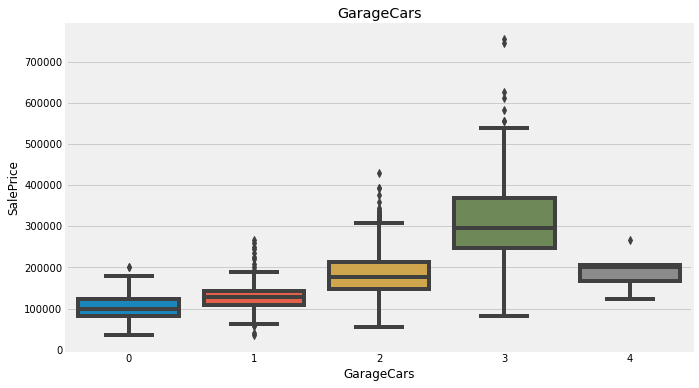

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='SalePrice',x='GarageCars')
plt.title('GarageCars');


(-100.0, 1500.0)

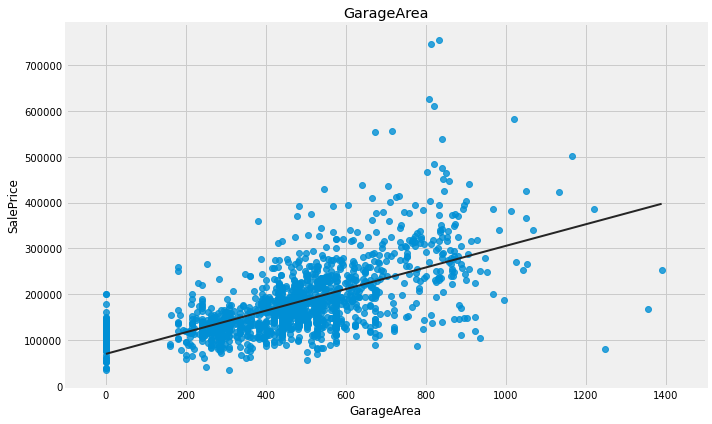

In [17]:
plt.figure(figsize=(10,6))
p1=sns.regplot(x='GarageArea',y='SalePrice',data=train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')
plt.title('GarageArea')
plt.tight_layout();
plt.xlim(-100, 1500)

## Outliers

In [18]:
train[((train['SalePrice']>700000) & (train['GarageArea']>800)) | ((train['SalePrice']<100000) & 
(train['GarageArea']>1200)) ][['OverallQual','GarageCars','GarageArea','SalePrice']]

,OverallQual,GarageCars,GarageArea,SalePrice
691,10,3,832,755000
1061,3,3,1248,81000
1182,10,3,813,745000


In [19]:
ntrain = train.shape[0] 
ntest = test.shape[0]
df = pd.concat((train, test)).reset_index(drop=True)

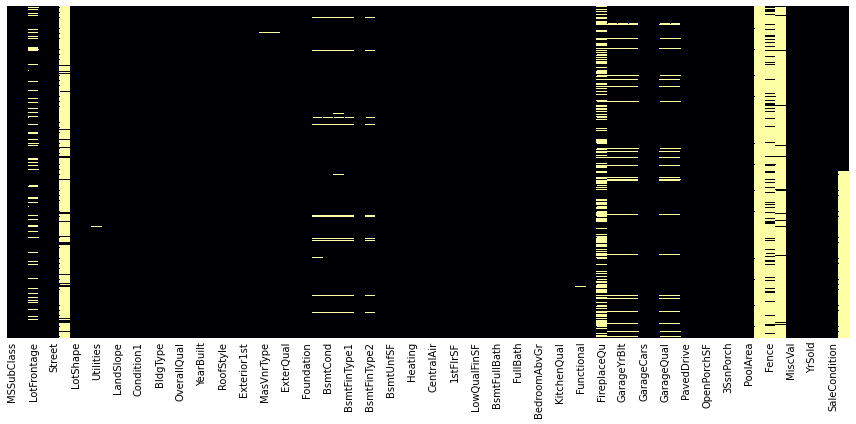

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno')
plt.xticks(ha='center')
plt.tight_layout();

In [21]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
missing_values_table(df)

              n_miss  ratio
PoolQC          2908  99.69
MiscFeature     2812  96.40
Alley           2719  93.21
Fence           2346  80.43
SalePrice       1459  50.02
FireplaceQu     1420  48.68
LotFrontage      486  16.66
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageCond       159   5.45
GarageType       157   5.38
BsmtCond          82   2.81
BsmtExposure      82   2.81
BsmtQual          81   2.78
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Utilities          2   0.07
BsmtFinSF2         1   0.03
BsmtUnfSF          1   0.03
BsmtFinSF1         1   0.03
TotalBsmtSF        1   0.03
SaleType           1   0.03
KitchenQual        1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
Electrical         1

# Lidando com os valores faltando

## Preenchendo os valores "nan" com "none"  

In [22]:
for i in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
    df[i] = df[i].apply(lambda x : 'None' if str(x) == "nan" else x ) 

In [23]:
df['Alley']

0       None
1       None
2       None
3       None
4       None
        ... 
2912    None
2913    None
2914    None
2915    None
2916    None
Name: Alley, Length: 2917, dtype: object

## feature LotFrontage

In [24]:
df['LotFrontage'] = df.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

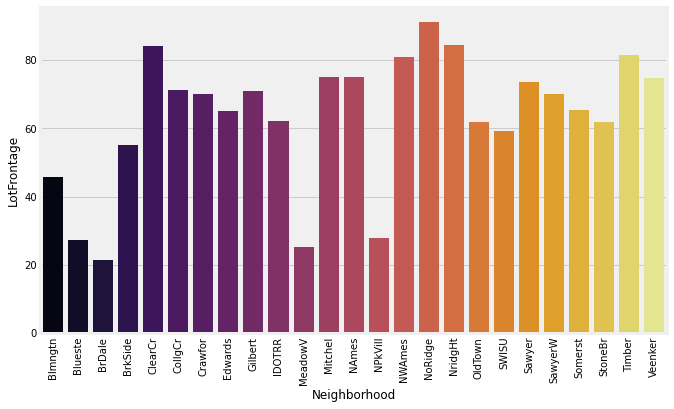

In [25]:
plt.figure(figsize=(10,6))
mean_lot=df.groupby("Neighborhood").mean()['LotFrontage']
sns.barplot(x=mean_lot.index,y=mean_lot, palette='inferno')
plt.ylabel('LotFrontage')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.show()

## Features sobre garagem

In [26]:
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[i]=df[i].fillna('None', inplace = True)

In [27]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[i].fillna(0,inplace=True)

## Feature Bsmt

In [28]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[i].fillna('None',inplace=True)
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[i].fillna(0,inplace=True)

## Feature Masvnr

In [29]:
df["MasVnrType"].fillna("None",inplace=True)
df["MasVnrArea"].fillna(0,inplace=True)

## MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities e Functional

In [30]:
for i in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Utilities','Functional'):
    df[i].fillna(df[i].mode()[0],inplace=True)

## Verificando dados faltando novamente

In [31]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

# Feature Engineering

## Criando feature TotalBath

In [32]:
df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

## Criando Feature "TotalQuality"

In [33]:
df['TotalQuality'] = df['OverallQual'] + df['OverallCond']

## Criando Feature "HouseAge"

In [34]:
df['HouseAge']=df['YrSold'].apply(int)-df['YearRemodAdd']

## Criando Feature "TotalSf"

In [35]:
df['TotalSF'] =df['TotalBsmtSF'] + df['GrLivArea']

## Criando Feature "TPorchSF"

In [36]:
df['TPorchSF'] =df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

## Criando Feature "2floor"

In [37]:
df['2floor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

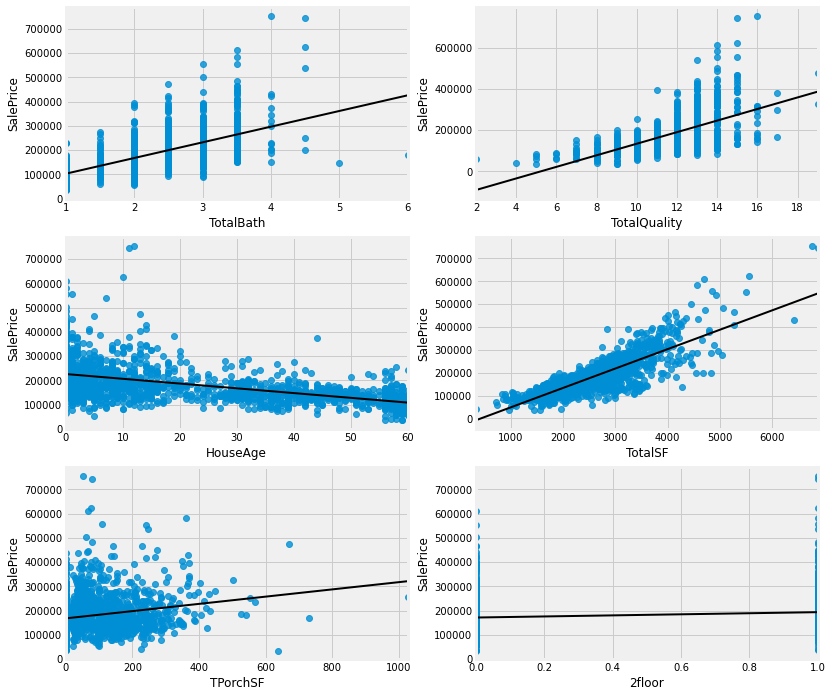

<Figure size 432x288 with 0 Axes>

In [38]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(12,12))
sns.regplot(x='TotalBath', y='SalePrice', data=df, ax=axs[0,0],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
sns.regplot(x='TotalQuality', y='SalePrice', data=df, ax=axs[0,1],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
sns.regplot(x='HouseAge',y='SalePrice', data=df, ax=axs[1,0],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
sns.regplot(x='TotalSF',y='SalePrice', data=df, ax=axs[1,1],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
sns.regplot(x='TPorchSF',y='SalePrice', data=df, ax=axs[2,0],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
sns.regplot(x='2floor',y='SalePrice', data=df, ax=axs[2,1],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
plt.show()
plt.tight_layout()


## Lidando com dados inviesados

In [39]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [40]:
df.drop('SalePrice',axis=1,inplace=True)

In [41]:
skewed=dict(df.skew().sort_values(ascending=False))

In [42]:
kremove =['GarageCars', 'YearRemodAdd', 'TotalQuality', 'YearBuilt', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for key in kremove:

  del skewed[key]

In [43]:
pd.DataFrame(data=skewed.values(),index=skewed.keys(),columns=['Skew Values']).head(20)

,Skew Values
MiscVal,21.950962
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131
BsmtHalfBath,3.932018


In [44]:
df.drop('Id', inplace = True)

KeyError: "['Id'] not found in axis"

In [45]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)

In [46]:
for i in skewed.keys():
       if skewed[i]<.8 or i=='MSSubClass':
            continue
       else:
            df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1)) 
          

In [47]:
skewed=dict(df.skew().sort_values(ascending=False))
pd.DataFrame(data=skewed.values(),index=skewed.keys(),columns=['Skew Values']).head(20)

,Skew Values
PoolArea,15.603081
3SsnPorch,8.866605
LowQualFinSF,8.496985
MiscVal,5.240678
BsmtHalfBath,3.781379
KitchenAbvGr,3.780280
ScreenPorch,3.154254
BsmtFinSF2,2.579656
EnclosedPorch,2.150238
MSSubClass,1.375838


## Normalizando a feature SalePrice

In [48]:
from scipy import stats

In [49]:
train['SalePrice'].skew()

1.8812964895244009

In [50]:
train['SalePrice']=np.log1p(train['SalePrice'])

In [51]:
train['SalePrice'].skew()

0.12157976050304882

In [52]:
y_train=train['SalePrice'].reset_index(drop=True)

# Modelando

## Variáveis dummies

In [53]:
df=pd.get_dummies(df,drop_first=True)

In [54]:
df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 245, dtype: int64

## Estanciando os dados de treino e de teste


In [55]:
X_train = df[:ntrain]
X_test = df[ntrain:]

In [56]:
X_train.drop('Id',inplace= True,axis=1)

KeyError: "['Id'] not found in axis"

In [57]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [58]:
y_train.isnull().sum()

0

## Verificando o shape dos dados

In [59]:
y_train.shape,X_train.shape,X_test.shape

((1458,), (1458, 245), (1459, 245))

## Importando modelos

In [60]:
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor,RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import cross_val_score,train_test_split,KFold,GridSearchCV
from sklearn.pipeline import make_pipeline ,Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler

## Cross Validation 

In [61]:
kf = KFold(5, shuffle=True, random_state=42)
def rmsecv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, cv = kf,scoring='neg_mean_squared_error',error_score='raise'))
    scores.append(['{:3f}'.format(rmse.mean()),'{:3f}'.format(rmse.std())])

## Hiperparâmetros


In [63]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [64]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha= 0.0005395401757154939,
                                         max_iter= 2713,
                                         normalize= False,
                                         positive= False,
                                         random_state= 42,
                                         selection= 'random',
                                         tol= 0.006902489174276111,
                                         warm_start= False,copy_X=True,fit_intercept=True,precompute=False))
elasticnet=make_pipeline(RobustScaler(),ElasticNet(alpha= 0.006528654958339889,
                                                   l1_ratio= 0.027196526024128087,
                                                   max_iter= 2286,
                                                   normalize=False,
                                                   positive=False,
                                                   random_state= 42,
                                                   selection= 'cyclic',
                                                   tol= 0.003954468580556897,
                                                  warm_start= False,copy_X=False,fit_intercept=True,precompute=False))
svr = make_pipeline(RobustScaler(), SVR(C= 26.25, epsilon= 0.0215, gamma=0.000235))
gbr=GradientBoostingRegressor(n_estimators=6500,
                                  learning_rate=0.008,
                                  max_depth=3,
                                  max_features='sqrt',
                                  criterion='friedman_mse',
                                  min_samples_leaf=15,
                                  min_samples_split=11,
                                  loss='huber',random_state=42)
lgbm=LGBMRegressor(bagging_fraction = 0.9396546294370978,
             bagging_freq= 20,
             bagging_seed= 26,
             boosting_type='gbdt',
             feature_fraction=0.18000984904260108,
             feature_fraction_seed= 24,
             learning_rate= 0.0040468864436411135,
             min_sum_hessian_in_leaf=7,
             n_estimators= 4014,
             num_leaves= 13,
             objective='regression',
             random_state= 42,
                     verbosity=-1)

xgb=XGBRegressor(random_state=42,verbosity=0,
            n_estimators=8025,
            learning_rate=0.005959814917079281, 
            colsample_bytree=0.0780460264599038, 
            gamma=0.0051170320540329977, 
            max_depth=5, 
            min_child_weight=0.7706298621431724, 
            reg_alpha=0.011645470627696723, 
            reg_lambda=0.9138427702529622,
            subsample=0.297642172460661)



## Utilizando Stacking Regressor

In [65]:
est=[      ('lasso',lasso),
           ('enet',elasticnet),
           ('svr',svr),
           ('gbr',gbr),
           ('lgbm',lgbm),
           ('xgb',xgb)
    ]
stacked=StackingRegressor(cv=kf,estimators=est,passthrough=False,final_estimator=xgb)

## Modelos

In [66]:
models=[
        lasso,
        elasticnet,
        svr,
        gbr,
        lgbm,
        xgb,
        ]

## Scores 

In [67]:
%%time
scores=[]
for i in models:
    try:
        rmsecv(i)
    except Exception as e:
        print(i,'\n',e)

Wall time: 3min 46s


In [68]:
scores

[['0.111765', '0.007977'],
 ['0.111115', '0.008506'],
 ['0.110744', '0.010139'],
 ['0.111858', '0.011062'],
 ['0.114611', '0.010028'],
 ['0.114209', '0.009639']]

In [69]:
mods=['Lasso','ElasticNet','SVR','GBR','LightGBM','XGBoost']
scores
df=(pd.DataFrame(scores,index=mods,columns=['RMSE','STD']))
df['RMSE'] = df['RMSE'].astype(float, errors = 'raise')

In [70]:
df['RMSE'].sort_values(ascending = True)

SVR           0.110744
ElasticNet    0.111115
Lasso         0.111765
GBR           0.111858
XGBoost       0.114209
LightGBM      0.114611
Name: RMSE, dtype: float64

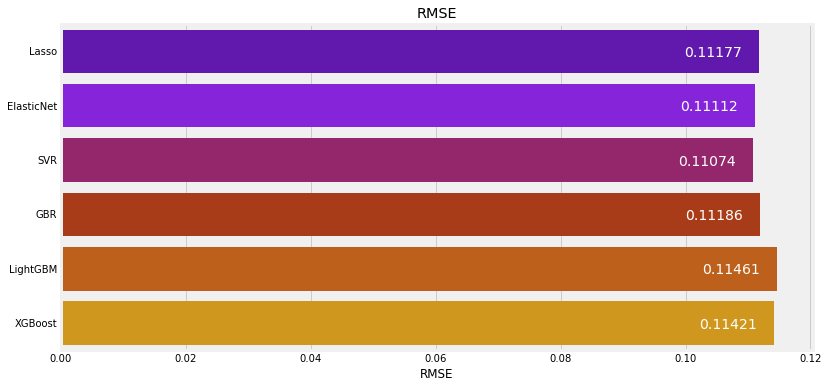

In [71]:
fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.barplot(x=df['RMSE'],y=df.index,palette='gnuplot')
for p in axes.patches:
            value = '{:.5f}'.format(p.get_width())
            x = p.get_x() + p.get_width()-.012
            y = p.get_y() + p.get_height()-.3
            axes.text(x, y, (value), ha="left",fontsize=14,color='#ffffff')
plt.title('RMSE');

## Predições e submissão

In [72]:
lasso.fit(X_train,y_train)
pred_lasso=np.expm1(lasso.predict(X_test))

In [73]:
elasticnet.fit(X_train,y_train)
pred_enet=np.expm1(elasticnet.predict(X_test))

In [74]:
svr.fit(X_train,y_train)
pred_svr=np.expm1(svr.predict(X_test))

In [75]:
gbr.fit(X_train,y_train)
pred_gbr=np.expm1(gbr.predict(X_test))

In [76]:
lgbm.fit(X_train,y_train)
pred_lgbm=np.expm1(lgbm.predict(X_test))

In [77]:
xgb.fit(X_train,y_train)
pred_xgb=np.expm1(xgb.predict(X_test))

In [78]:
stacked.fit(X_train,y_train)
pred_stacked=np.expm1(stacked.predict(X_test))

In [79]:
avg_pred=(pred_enet+pred_lasso+pred_svr+pred_gbr+pred_lgbm+pred_xgb+pred_stacked)/7

In [80]:
submission=pd.DataFrame({'Id': ids, 'SalePrice': avg_pred})

In [82]:
submission.reset_index()

,index,Id,SalePrice
0,0,1461,120580.741484
1,1,1462,159216.720949
2,2,1463,187197.026005
3,3,1464,198616.785224
4,4,1465,191378.242987
...,...,...,...
1454,1454,2915,84902.171469
1455,1455,2916,86105.067548
1456,1456,2917,170534.207144
1457,1457,2918,114850.663700


In [83]:
submission.to_csv('submission.csv',index=False)